# Performance

In [6]:
#imported python packages
import numpy as np
import pandas as pd
from math import sqrt
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
import pickle
import joblib

In [2]:
# import dataset about train dataset 
train_df = pd.read_csv("train_df.csv")

In [3]:
train_df.info()
train_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   segment_id           602 non-null    int64  
 1   time_to_eruption     602 non-null    int64  
 2   sensor_1_nanmin      602 non-null    float64
 3   sensor_2_nanmin      602 non-null    float64
 4   sensor_3_nanmin      602 non-null    float64
 5   sensor_4_nanmin      602 non-null    float64
 6   sensor_5_nanmin      602 non-null    float64
 7   sensor_6_nanmin      602 non-null    float64
 8   sensor_7_nanmin      602 non-null    float64
 9   sensor_8_nanmin      602 non-null    float64
 10  sensor_9_nanmin      602 non-null    float64
 11  sensor_10_nanmin     602 non-null    float64
 12  sensor_1_nanmax      602 non-null    float64
 13  sensor_2_nanmax      602 non-null    float64
 14  sensor_3_nanmax      602 non-null    float64
 15  sensor_4_nanmax      602 non-null    flo

,segment_id,time_to_eruption,sensor_1_nanmin,sensor_2_nanmin,sensor_3_nanmin,sensor_4_nanmin,sensor_5_nanmin,sensor_6_nanmin,sensor_7_nanmin,sensor_8_nanmin,...,sensor_1_nanstd,sensor_2_nanstd,sensor_3_nanstd,sensor_4_nanstd,sensor_5_nanstd,sensor_6_nanstd,sensor_7_nanstd,sensor_8_nanstd,sensor_9_nanstd,sensor_10_nanstd
0,1323724621,47861879,-2124.0,-2850.0,-2410.0,-991.0,-1078.0,-2197.0,-4024.0,-2444.0,...,304.556418,336.839651,733.297301,232.474625,97.347796,570.091465,373.866779,574.299883,213.095186,401.136290
1,1581535482,47810569,-2061.0,-7280.0,0.0,-2056.0,-1591.0,-7224.0,-3333.0,-3100.0,...,448.877816,503.899889,0.000000,352.482562,150.162076,2002.897183,533.233834,868.914034,252.359595,630.553190
2,594908465,47775708,-1531.0,-13000.0,-1156.0,-1918.0,-1509.0,-809.0,-1064.0,-938.0,...,342.190608,1258.236329,271.922069,344.210093,230.737410,194.070538,234.100675,222.932381,390.477264,821.316795
3,995669347,47715187,-2130.0,-5213.0,0.0,-1488.0,-1779.0,-6427.0,-5382.0,-13998.0,...,464.925386,393.080345,0.000000,308.931083,142.109170,1710.020864,554.735908,931.369282,328.429315,568.895903
4,895093954,47362238,-1009.0,-4986.0,-931.0,-979.0,-1098.0,-2499.0,-2011.0,-702.0,...,185.900141,549.202012,203.889181,211.165167,128.287458,402.175407,170.829436,186.614540,237.884053,338.188283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,546241772,386910,-1953.0,0.0,-2047.0,-1898.0,-2593.0,-2194.0,-2716.0,0.0,...,275.557088,0.000000,240.808846,399.983434,207.210368,264.248359,291.411985,0.000000,311.783935,615.171584
598,2140509127,376369,-1454.0,-9310.0,-1223.0,-1858.0,-460.0,-3476.0,-4734.0,-2856.0,...,381.743545,943.990710,323.552400,375.720275,23.623666,968.689909,639.425184,780.247065,348.688150,706.266658
599,82371649,273119,-2096.0,-7641.0,-2061.0,-2851.0,-1615.0,-2362.0,-2779.0,-5034.0,...,560.734713,1783.008667,516.670771,676.502377,355.364398,641.416562,523.310707,444.811259,629.645603,1112.261832
600,442994108,28696,-3120.0,-10881.0,-3182.0,-2882.0,-500.0,-8073.0,-5954.0,-5639.0,...,768.764843,1069.847410,727.041662,688.871537,8.594175,1853.461419,1189.510581,1464.082327,505.825412,1191.737480


In [4]:
# import dataset about test dataset
test_df = pd.read_csv("test_df.csv")

In [5]:
test_df.info()
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   segment_id           730 non-null    int64  
 1   sensor_1_nanmin      730 non-null    float64
 2   sensor_2_nanmin      730 non-null    float64
 3   sensor_3_nanmin      730 non-null    float64
 4   sensor_4_nanmin      730 non-null    float64
 5   sensor_5_nanmin      730 non-null    float64
 6   sensor_6_nanmin      730 non-null    float64
 7   sensor_7_nanmin      730 non-null    float64
 8   sensor_8_nanmin      730 non-null    float64
 9   sensor_9_nanmin      730 non-null    float64
 10  sensor_10_nanmin     730 non-null    float64
 11  sensor_1_nanmax      730 non-null    float64
 12  sensor_2_nanmax      730 non-null    float64
 13  sensor_3_nanmax      730 non-null    float64
 14  sensor_4_nanmax      730 non-null    float64
 15  sensor_5_nanmax      730 non-null    flo

,segment_id,sensor_1_nanmin,sensor_2_nanmin,sensor_3_nanmin,sensor_4_nanmin,sensor_5_nanmin,sensor_6_nanmin,sensor_7_nanmin,sensor_8_nanmin,sensor_9_nanmin,...,sensor_1_nanstd,sensor_2_nanstd,sensor_3_nanstd,sensor_4_nanstd,sensor_5_nanstd,sensor_6_nanstd,sensor_7_nanstd,sensor_8_nanstd,sensor_9_nanstd,sensor_10_nanstd
0,19158067,-2399.0,-8479.0,-2144.0,-2389.0,0.0,-1907.0,-2725.0,-2276.0,-2724.0,...,537.587907,1699.642640,488.428506,628.862467,0.000000,626.450176,423.136659,366.716709,603.546006,1030.271718
1,146639315,-1723.0,0.0,-724.0,-1160.0,0.0,-1652.0,-1448.0,-1485.0,-1021.0,...,240.370824,0.000000,193.623152,240.484128,0.000000,458.342099,333.692933,383.048540,227.338089,0.000000
2,53465103,-1954.0,-12546.0,-1598.0,-2226.0,-2141.0,-1945.0,-2745.0,-4303.0,-2517.0,...,342.889228,1229.756449,317.728830,399.617610,276.604136,519.396151,373.585216,563.451633,428.984636,720.398171
3,638074752,0.0,-4235.0,-20655.0,-6658.0,0.0,-9065.0,-4387.0,-5068.0,0.0,...,0.000000,614.304876,3660.014773,962.320752,0.000000,2342.946778,1206.039887,1572.148256,0.000000,0.000000
4,106558646,-25412.0,-32767.0,-32217.0,-27204.0,-10254.0,-10223.0,-15007.0,-14700.0,-30379.0,...,6626.926248,9987.517121,6586.279472,6676.764197,2435.131706,2966.428407,3244.105584,2942.466744,8078.247900,8753.817270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1265147,0.0,-2902.0,-8789.0,-2326.0,0.0,-1434.0,-2194.0,-1860.0,0.0,...,0.000000,486.778062,1714.410765,364.205085,0.000000,468.322480,323.412116,345.154588,0.000000,0.000000
726,115078097,-3924.0,-9948.0,-3716.0,-4771.0,-1192.0,-6078.0,-249.0,-358.0,-3389.0,...,611.803833,825.136816,509.310464,557.989619,184.299317,1662.581413,53.218984,66.156907,540.139436,849.049759
727,577108378,0.0,-2052.0,-4692.0,-2369.0,0.0,-1905.0,-1070.0,-1422.0,0.0,...,0.000000,450.901986,1424.694280,421.877082,0.000000,537.036483,299.404112,353.516468,0.000000,0.000000
728,108980580,-2973.0,0.0,-1816.0,-4907.0,-4735.0,-1170.0,-1643.0,0.0,-3476.0,...,280.260756,0.000000,242.735532,341.654619,239.321704,259.951368,233.648477,0.000000,347.004512,634.634993


In [7]:
# Splitting the train dataset into test, validation, and train dataset
X_train, X_test, Y_train, Y_test = train_test_split(train_df.drop(columns=["segment_id","time_to_eruption"]),
                                                    train_df[["time_to_eruption"]],
                                                    test_size=0.20)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.20)

In [8]:
# XGB model loaded
xgb_model = joblib.load('xgb_model.joblib')

In [10]:
# get the predictions for the validation data
Y_pred_xgb = xgb_model.predict(X_val)

In [11]:
# transforming Y_val dataframe to numpy array
Y_valid = Y_val.to_numpy()
Y_valid = Y_valid.flatten()
Y_valid

array([36029555,  2778919, 11440320, 45002765,  9924307, 28772117,
       44830265, 15117628, 17866148,  7412828, 18814834, 18740213,
       38546852, 21308936,  1357697,  4557852,  2167660, 39732623,
       19138821,  7163152,  9261859, 16912715, 12844995, 28213217,
       46435141, 15046200, 11457189,  1536927,  4494244, 16327110,
       29457928, 16552095, 11870576, 14454962, 34598467,   376369,
       13656473, 13237465,  3567310, 19655605, 14964357, 31100303,
       38960058, 44573441, 38302199,  7488081, 21379271, 15918903,
       44476899,  7252237, 25468953, 15088404, 26055298, 32420477,
       43859980, 11919352, 15898458,  2507552, 15559380,  3290204,
       20818447, 45026528, 26603831, 41916091, 36827935, 16882521,
       28425095, 30783919, 43395620, 36385572, 28574695, 21773796,
       26273131, 21310001,  2717940, 18808971, 31005903, 44621939,
       46927271, 26946321, 41052996,  4522464, 27128726, 41478190,
         905192, 14442539, 28076355, 16425646, 41331696, 38421

In [12]:
# array created for the difference between valid and test prediction
accuracy_xgb = ((Y_pred_xgb-Y_valid)/Y_valid)

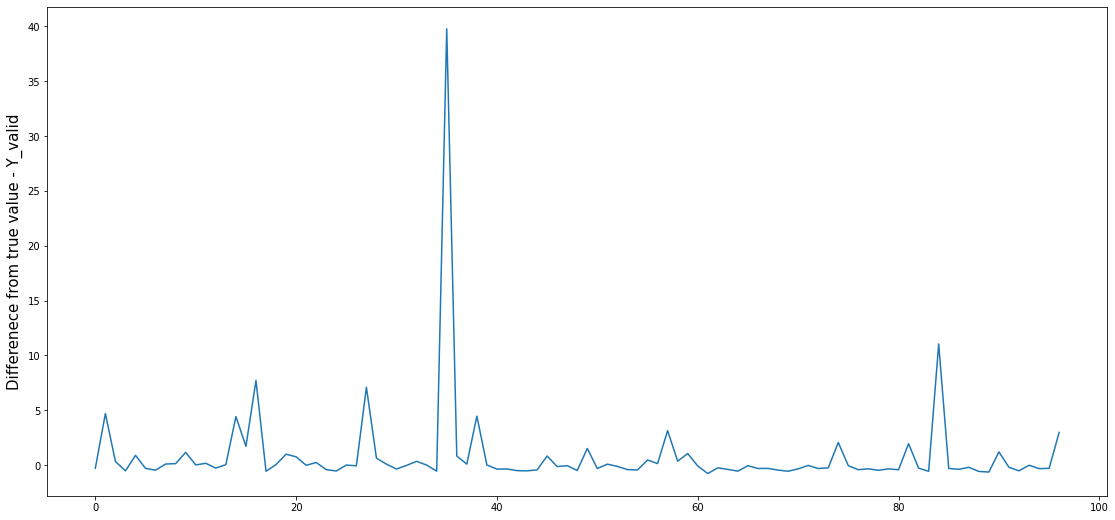

In [13]:
# performnace plot for xgb
fig = plt.figure(figsize = (19,9))
plt.plot(accuracy_xgb)
plt.ylabel("Differenece from true value - Y_valid",fontsize=15)
plt.show()

In [14]:
# RandomForest model loaded
rf_model = joblib.load('rf_model.joblib')

In [15]:
# get the predictions for the validation data
Y_pred_rf = rf_model.predict(X_val)

In [16]:
# array created for the difference between valid and test prediction
accuracy_rf = ((Y_pred_rf-Y_valid)/Y_valid)

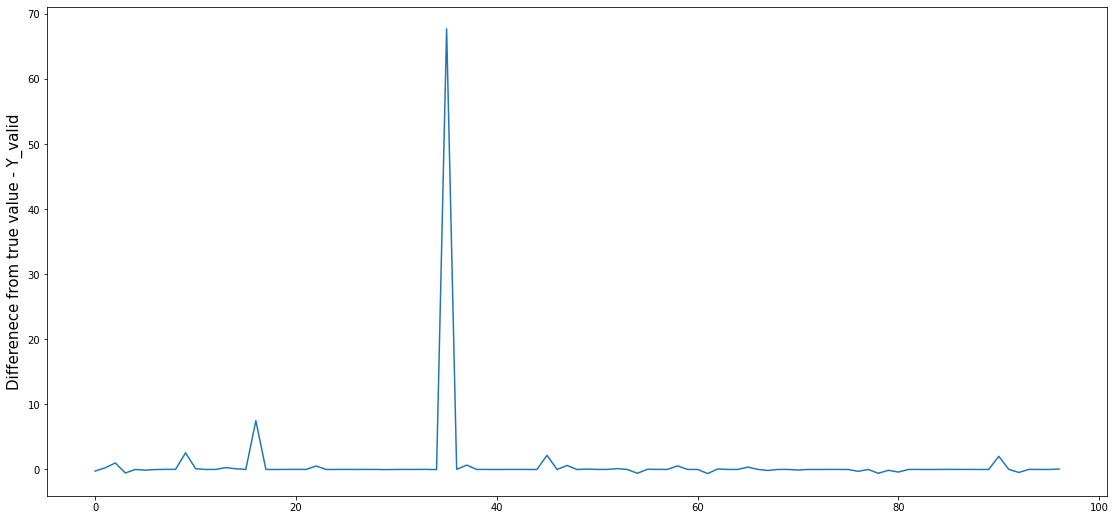

In [17]:
# performnace plot for RandomForest
fig = plt.figure(figsize = (19,9))
plt.plot(accuracy_rf)
plt.ylabel("Differenece from true value - Y_valid",fontsize=15)
plt.show()

### From the plots above RandomForest has better prediction because the difference between true and predicted value is closer to zero but still some variation is seen. While XGBRegressor Model has more variation than RandomForest plot. 